<a href="https://colab.research.google.com/github/Priyam145/MLprojects/blob/main/notebooks/Support_Vector_Machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [2]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]
y = (iris["target"] == 2).astype(np.float64)  

In [3]:
svm_clf = Pipeline([
            ("scalar", StandardScaler()),
            ("linear_svc", LinearSVC(C=1, loss="hinge")),
])

In [4]:
svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scalar',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [5]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

# Non-Linear Classification:

In [6]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [7]:
X, y = make_moons(n_samples=100, noise=0.15)
polynomial_svm_clf = Pipeline([
                        ("poly_features", PolynomialFeatures(degree=3)),
                        ("scalar", StandardScaler()),
                        ("linear_svc", LinearSVC(C=10, loss="hinge")),
])

In [8]:
polynomial_svm_clf.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scalar',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

## Polynomial Kernel:

In [9]:
from sklearn.svm import SVC

In [10]:
poly_kernel_svc_clf = Pipeline([
                        ("scalar", StandardScaler()),
                        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5)),
])

In [11]:
poly_kernel_svc_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scalar',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=1, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

## Gaussian RBF Kernel

In [12]:
rbf_kernel_svm_clf = Pipeline([
                        ("scaler", StandardScaler()),
                        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001)),
])

In [13]:
rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=0.001, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

# SVM Regression

In [14]:
from sklearn.svm import LinearSVR

In [15]:
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [16]:
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

# Exercise:

## Ans.8

In [50]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_validate

In [79]:
df = datasets.load_iris()
X = df["data"][:, (2, 3)]
y = df["target"]
df['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [53]:
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [54]:
X[:5]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

In [55]:
y[:5]

array([0, 0, 0, 0, 0])

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [57]:
print(X_train.shape)
print(X_test.shape)

(80, 2)
(20, 2)


In [58]:
linear_svc = LinearSVC(C=1, loss='hinge')

In [59]:
linear_svc.fit(X_train, y_train)

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [60]:
m = X_train.shape[0]
sgd_clf = SGDClassifier(loss='hinge', penalty='l2', alpha=(1/(m*1)))

In [61]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0125, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [67]:
import numpy as np
import matplotlib.pyplot as plt

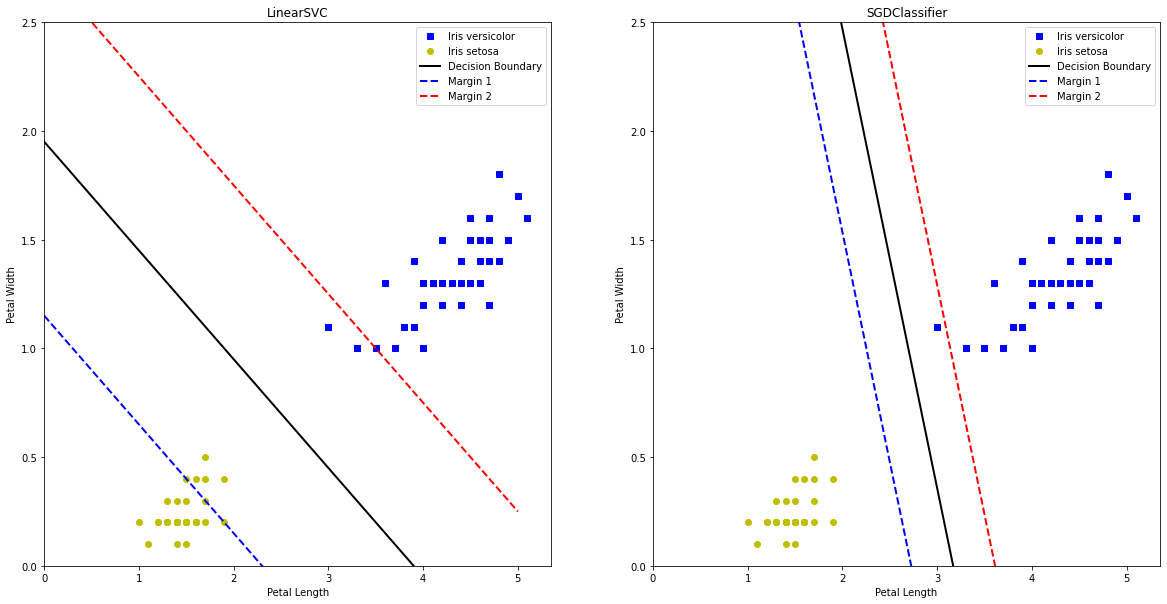

In [98]:
fig, axs = plt.subplots(figsize=(20, 10), ncols=2)
fig.set_facecolor('white')

# plotting Linear SVC plot
axs[0].plot(X_train[:, 0][y_train==1], X_train[:, 1][y_train==1], "bs", label="Iris versicolor")
axs[0].plot(X_train[:, 0][y_train==0], X_train[:, 1][y_train==0], "yo", label="Iris setosa")
w = linear_svc.coef_[0]
b = linear_svc.intercept_[0]
x0 = np.linspace(np.int(np.min((np.min(X_train[:, 0]), np.min(X_train[:, 1])))), 
                 np.int(np.max((np.max(X_train[:, 0]), np.max(X_train[:, 1])))),
                 80)
margin_width = 1/w[1]
decision_boundary = -w[0]/w[1] * x0 - b/w[1]
margin_1 = decision_boundary - margin_width
margin_2 = decision_boundary + margin_width
axs[0].plot(x0, decision_boundary, "k-", linewidth=2, label='Decision Boundary')
axs[0].plot(x0, margin_1, "b--", linewidth=2, label='Margin 1')
axs[0].plot(x0, margin_2, "r--", linewidth=2, label='Margin 2')
axs[0].set_xlabel('Petal Length')
axs[0].set_ylabel('Petal Width')
axs[0].set_xlim(xmin=0)
axs[0].set_ylim(ymin=0, ymax=2.5)
axs[0].set_title('LinearSVC')
axs[0].legend();


# plotting SGD Classifier plot
axs[1].plot(X_train[:, 0][y_train==1], X_train[:, 1][y_train==1], "bs", label="Iris versicolor")
axs[1].plot(X_train[:, 0][y_train==0], X_train[:, 1][y_train==0], "yo", label="Iris setosa")
w = sgd_clf.coef_[0]
b = sgd_clf.intercept_[0]
x0 = np.linspace(np.int(np.min((np.min(X_train[:, 0]), np.min(X_train[:, 1])))), 
                 np.int(np.max((np.max(X_train[:, 0]), np.max(X_train[:, 1])))),
                 80)
margin_width = 1/w[1]
decision_boundary = -w[0]/w[1] * x0 - b/w[1]
margin_1 = decision_boundary - margin_width
margin_2 = decision_boundary + margin_width
axs[1].plot(x0, decision_boundary, "k-", linewidth=2, label='Decision Boundary')
axs[1].plot(x0, margin_1, "b--", linewidth=2, label='Margin 1')
axs[1].plot(x0, margin_2, "r--", linewidth=2, label='Margin 2')
axs[1].set_xlabel('Petal Length')
axs[1].set_ylabel('Petal Width')
axs[1].set_xlim(xmin=0)
axs[1].set_ylim(ymin=0, ymax=2.5)
axs[1].set_title('SGDClassifier')
axs[1].legend();

## Ans.9

In [1]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [4]:
X = mnist['data']
y = mnist['target']
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [5]:
X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

In [6]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [7]:
OvR_svc = OneVsRestClassifier(SVC(kernel='linear'))

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

In [ ]:
OvR_svc.fit(X_train_scaled, y_train)

In [120]:
from sklearn.metrics import accuracy_score

In [121]:
predictions = OvR_svc.predict(X_test)

In [122]:
accuracy_score(y_test, predictions)

0.9416666666666667